<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%EC%BB%A4%ED%94%BC%EC%A0%84%EB%AC%B8%EC%A0%90_%EC%A7%80%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# folium 라이브러리를 사용하여 지도를 그려보자
위도와 경도좌표, 배율을 지정한다


In [2]:
import pandas as pd; import numpy as np; import seaborn as sns; import folium; import matplotlib.pyplot as plt

seoul=[37.562225, 126.978555]   ## 위도와 경도 좌표
map = folium.Map(location=seoul, zoom_start=12)
map

# KISDI 좌표를 찍어봅시다

In [17]:
kisdi=[36.903, 127.542]   ## 위도와 경도 좌표
map1 = folium.Map(location=kisdi, zoom_start=16)
folium.Marker(
  location=kisdi,
  popup='정보통신정책연구원',
  icon=folium.Icon(color='red',icon='star')
).add_to(map1)
map1

#연습데이터 불러오기

In [0]:
## 커피전문점 데이터를 불러와서, 모든 매장의 좌표를 그림으로 표시해보자
!git clone https://github.com/hongjai-rhee/public.git
## 깃허브 디렉토리 마운트
dat = pd.read_csv('/content/public/coffee_seoul.csv', encoding='cp949')

dat.head()


Cloning into 'public'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 55 (delta 17), reused 35 (delta 8), pack-reused 0
Unpacking objects: 100% (55/55), done.


,brand,sic,city,gu,dong,address,zip,lon,lat,d250,d50,land,sales
0,Starbucks,I56220,서울특별시,강남구,삼성1동,서울특별시 강남구 테헤란로103길 9,6173,127.063878,37.510038,5,1,1.0,4800.0
1,Starbucks,I56220,서울특별시,강남구,논현1동,서울특별시 강남구 도산대로 108,6038,127.020635,37.516184,7,1,1.0,4416.0
2,Starbucks,I56220,서울특별시,강남구,삼성1동,서울특별시 강남구 영동대로 513,6164,127.057100,37.512939,3,2,1.0,3888.0
3,Starbucks,I56220,서울특별시,강남구,대치1동,서울특별시 강남구 도곡로 408,6278,127.055213,37.496615,2,2,1.0,4032.0
4,Starbucks,I56220,서울특별시,강남구,삼성1동,서울특별시 강남구 학동로 506,6084,127.051440,37.518688,5,1,1.0,4800.0


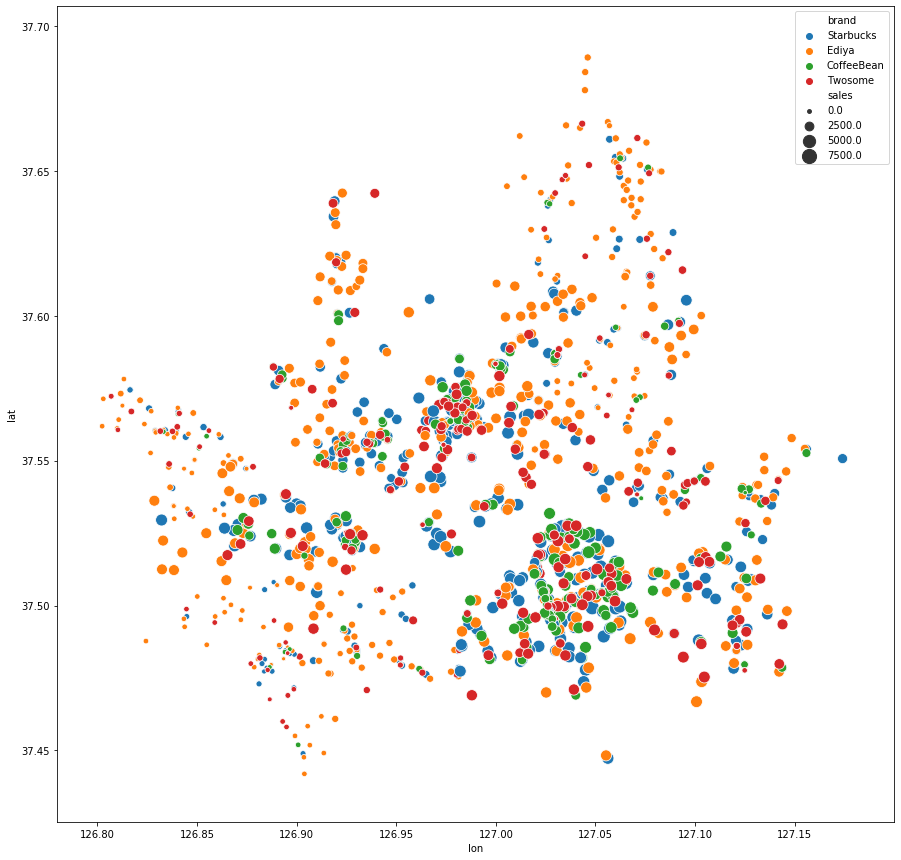

In [0]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=dat, x='lon', y='lat', hue='brand', size="sales", sizes=(15, 200))


# 서울지도에 표시할 수 있을까?

In [0]:
## 브랜드별로 데이터 나누기
# 스타벅스
df_1 = dat[dat['brand'].str.contains('Star')]
df_1.index = range(len(df_1))
print('서울시 내 스타벅스 점포 수 :', len(df_1))
df_1.head()

서울시 내 스타벅스 점포 수 : 500


,brand,sic,city,gu,dong,address,zip,lon,lat,d250,d50,land,sales
0,Starbucks,I56220,서울특별시,강남구,삼성1동,서울특별시 강남구 테헤란로103길 9,6173,127.063878,37.510038,5,1,1.0,4800.0
1,Starbucks,I56220,서울특별시,강남구,논현1동,서울특별시 강남구 도산대로 108,6038,127.020635,37.516184,7,1,1.0,4416.0
2,Starbucks,I56220,서울특별시,강남구,삼성1동,서울특별시 강남구 영동대로 513,6164,127.057100,37.512939,3,2,1.0,3888.0
3,Starbucks,I56220,서울특별시,강남구,대치1동,서울특별시 강남구 도곡로 408,6278,127.055213,37.496615,2,2,1.0,4032.0
4,Starbucks,I56220,서울특별시,강남구,삼성1동,서울특별시 강남구 학동로 506,6084,127.051440,37.518688,5,1,1.0,4800.0


In [0]:
## 스타벅스 매장 표시
map1 = folium.Map(location=seoul, zoom_start=12)
for i in range(df_1.shape[0]):
    folium.CircleMarker(list(df_1.iloc[i][['lat', 'lon']]),
                popup = df_1.iloc[i]['address'],
                radius=8, color='green',
                fill=True, fill_color='green').add_to(map1)
map1


In [0]:
# 이디야
df_2 = dat[dat['brand'].str.contains('Edi')]
df_2.index = range(len(df_2))
print('서울시 내 이디야 점포 수:', len(df_2))
df_2.head()

서울시 내 이디야 점포 수: 517


,brand,sic,city,gu,dong,address,zip,lon,lat,d250,d50,land,sales
0,Ediya,I56220,서울특별시,강남구,삼성1동,서울특별시 강남구 테헤란로87길 37,6166,127.057700,37.510205,7,2,1.0,2760.0
1,Ediya,I56220,서울특별시,강남구,역삼1동,서울특별시 강남구 논현로63길 16,6257,127.039099,37.492998,3,1,1.0,4320.0
2,Ediya,I56220,서울특별시,강남구,일원1동,서울특별시 강남구 양재대로27길 20,6343,127.081606,37.490399,2,2,1.0,3360.0
3,Ediya,I56220,서울특별시,강남구,삼성1동,서울특별시 강남구 테헤란로107길 11,6173,127.065038,37.510425,6,1,1.0,3840.0
4,Ediya,I56220,서울특별시,강남구,대치4동,서울특별시 강남구 삼성로85길 38,6194,127.054186,37.504536,5,2,1.0,3000.0


In [0]:
# 커피빈
df_3 = dat[dat['brand'].str.contains('Coffee')]
df_3.index = range(len(df_3))
print('서울시 내 커피빈 점포 수:', len(df_3))
df_3.head()

서울시 내 커피빈 점포 수: 225


,brand,sic,city,gu,dong,address,zip,lon,lat,d250,d50,land,sales
0,CoffeeBean,I56220,서울특별시,강남구,역삼1동,서울특별시 강남구 테헤란로 335,6150,127.048223,37.504750,7,1,1.0,3680.0
1,CoffeeBean,I56220,서울특별시,강남구,청담동,서울특별시 강남구 압구정로 461,6011,127.047216,37.525250,2,1,1.0,4480.0
2,CoffeeBean,I56220,서울특별시,강남구,역삼1동,서울특별시 강남구 테헤란로4길 28,6241,127.030075,37.496520,8,2,1.0,2640.0
3,CoffeeBean,I56220,서울특별시,강남구,청담동,서울특별시 강남구 삼성로 716,6074,127.050022,37.519902,2,1,1.0,4480.0
4,CoffeeBean,I56220,서울특별시,강남구,역삼1동,서울특별시 강남구 테헤란로 143,6132,127.034884,37.500641,9,3,1.0,1680.0


In [0]:
# 투썸
df_4 = dat[dat['brand'].str.contains('Two')]
df_4.index = range(len(df_4))
print('서울시 내 투썸 플레이스 점포 수:', len(df_4))
df_4.head()

서울시 내 투썸 플레이스 점포 수: 245


,brand,sic,city,gu,dong,address,zip,lon,lat,d250,d50,land,sales
0,Twosome,I56220,서울특별시,강남구,압구정동,서울특별시 강남구 도산대로 323,6021,127.036996,37.522887,4,2,1.0,3120.0
1,Twosome,I56220,서울특별시,강남구,압구정동,서울특별시 강남구 도산대로49길 3,6021,127.036949,37.523031,4,2,1.0,3120.0
2,Twosome,I56220,서울특별시,강남구,역삼1동,서울특별시 강남구 강남대로 362,6241,127.029400,37.495298,13,2,1.0,2040.0
3,Twosome,I56220,서울특별시,강남구,삼성1동,서울특별시 강남구 영동대로 513,6164,127.058188,37.510975,8,1,1.0,3520.0
4,Twosome,I56220,서울특별시,강남구,역삼2동,서울특별시 강남구 선릉로89길 16,6212,127.047799,37.503422,6,1,1.0,3840.0


In [0]:
## 이디야와 스타벅스 같이 그리기, 원의 크기는 매출액에 비례
map2 = folium.Map(location=seoul, zoom_start=12)
for i in range(df_2.shape[0]):
    folium.CircleMarker(list(df_2.iloc[i][['lat', 'lon']]),
                popup = df_2.iloc[i]['address'],
                radius=df_2.iloc[i]['sales']/1000, color='red',
                fill=True, fill_color='red').add_to(map2)
for i in range(df_1.shape[0]):
    folium.CircleMarker(list(df_1.iloc[i][['lat', 'lon']]),
                popup = df_1.iloc[i]['address'],
                radius=df_1.iloc[i]['sales']/1000, color='green',
                fill=True, fill_color='green').add_to(map2)
map2


# 커피전문점별 매출액(sales)의 차이를 어떻게 학습해서 예측할 수 있을까?
필요한 X 변수는 무엇일까?
